In [1]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [12]:
train_file = "data/dji/dji.csv"
df_train = pd.read_csv(train_file, sep=",", header=0)
l_train = len(df_train)
print("Length of training data: %d"%(l_train))

Length of training data: 567


In [13]:
df_train.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,40179,10430.69043,10612.37012,10430.69043,10606.86035,10606.86035,771750000
1,40186,10606.40039,10723.76953,10554.33008,10710.54981,10710.54981,1014940000
2,40193,10706.99023,10729.88965,10374.69043,10389.87988,10389.87988,1062640000


In [14]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)

Null check on training data:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


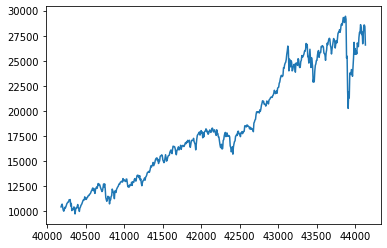

In [20]:
%matplotlib inline
index_data = df_train

#gets the price and dates from the matrix
dates = index_data["Date"]
prices = index_data["Open"]
#creates a plot of the data and then displays it
plt.plot(dates, prices)
plt.show()

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["Date", "Open"]].sample(frac=1,random_state=1).reset_index(drop=True)

train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True).sort_values(by='Date')
print("Length of train data: %d"%len(train.index))
dev = dev.reset_index(drop=True).sort_values(by='Date')
print("Length of test data: %d"%len(dev.index))

Length of train data: 396
Length of test data: 171


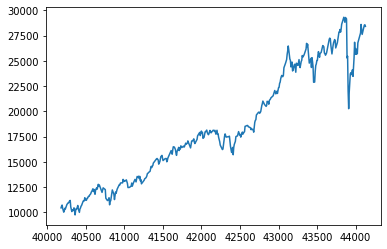

In [28]:
train_data = train

#gets the price and dates from the matrix
prices = train_data["Open"]
dates = train_data["Date"]

#creates a plot of the data and then displays it
plt.plot(dates, prices)
plt.show()

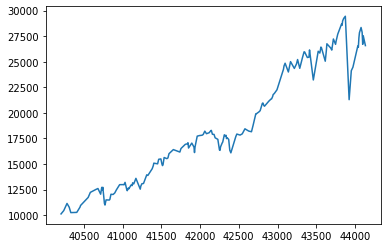

In [29]:
test_data = dev

#gets the price and dates from the matrix
prices = test_data["Open"]
dates = test_data["Date"]

#creates a plot of the data and then displays it
plt.plot(dates, prices)
plt.show()

In [69]:
train.to_csv("data/dji/train.csv", index=False)
dev.to_csv("data/dji/test.csv", index=False)